In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [2]:
### Load Data
boston = load_boston()
print("Keys:", boston.keys())
print("Shape:", boston.data.shape)
print("Columns", boston.feature_names)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Shape: (506, 13)
Columns ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# Create a data frame
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Data Exploration

In [4]:
# Minimum price of the data
minimum_price = np.min(boston.target)

# Maximum price of the data
maximum_price = np.max(boston.target)

# Mean price of the data
mean_price = np.mean(boston.target)

# Median price of the data
median_price = np.median(boston.target)

# Standard deviation of prices of the data
std_price = np.std(boston.target)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price * 1000))
print("Maximum price: ${:,.2f}".format(maximum_price * 1000))
print("Mean price: ${:,.2f}".format(mean_price * 1000))
print("Median price: ${:,.2f}".format(median_price * 1000))
print("Standard deviation: ${:,.2f}".format(std_price * 1000))

Statistics for Boston housing dataset:

Minimum price: $5,000.00
Maximum price: $50,000.00
Mean price: $22,532.81
Median price: $21,200.00
Standard deviation: $9,188.01


Check the relation between various features and price

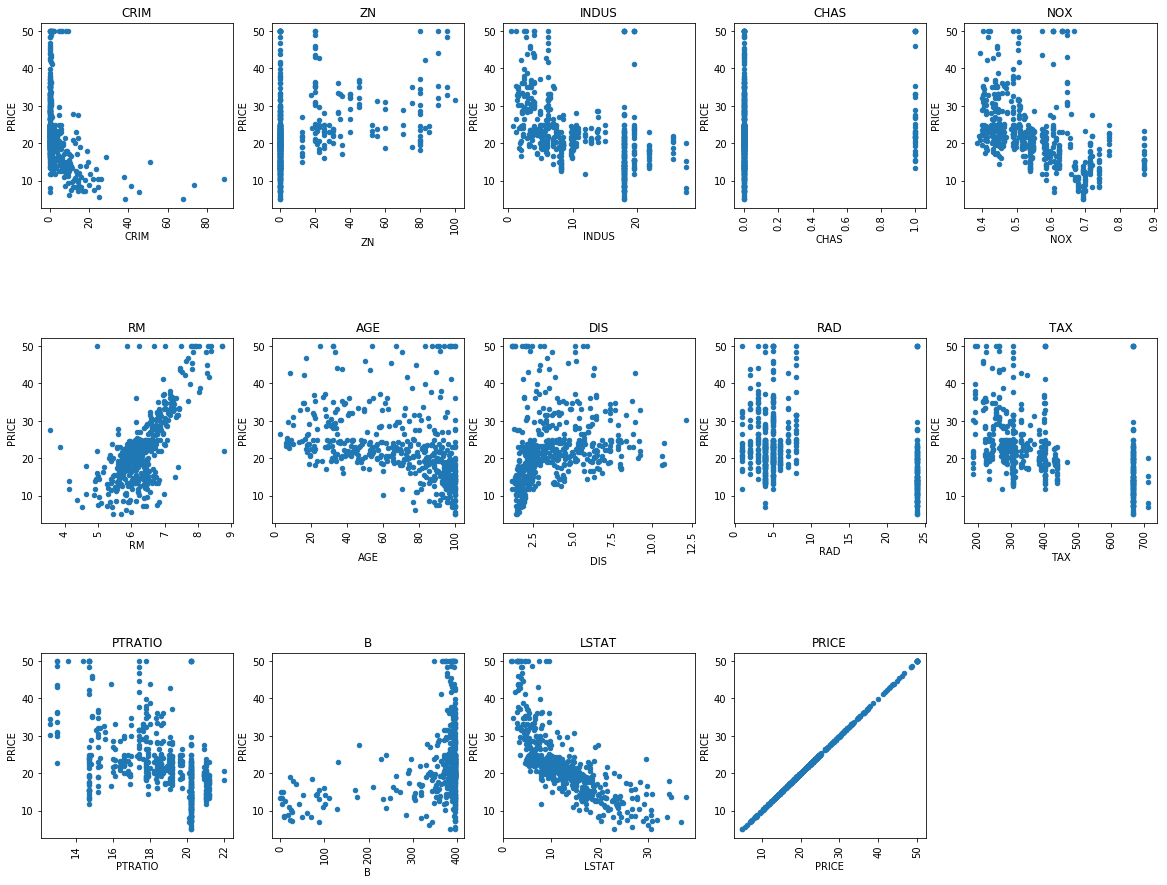

In [6]:
from matplotlib import pyplot as plt
from math import ceil

fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(bos.shape[1]) / cols)
for i, column in enumerate(bos.columns):
    axs = fig.add_subplot(rows, cols, i + 1)
    axs.set_title(column)
    bos.plot(kind='scatter', x=column, y='PRICE', ax=axs)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Build the model

In [7]:
# The column that we want to predict.
y_column = bos['PRICE']

# The columns that we will be making predictions with.
x_columns = bos.drop('PRICE', axis=1)

In [16]:
# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(x_columns, y_column, test_size = 0.3)

In [17]:
# Instantiate a linear regression model and fit the training set

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("Model Accuracy is:", format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')

Model Accuracy is: 72.67 %


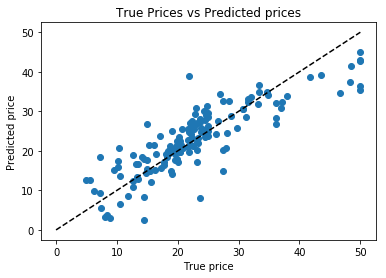

In [18]:
## PLOT true vs predicted prices and draw the line of fit

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel("True price")
plt.ylabel("Predicted price")
plt.title("True Prices vs Predicted prices")
plt.show()

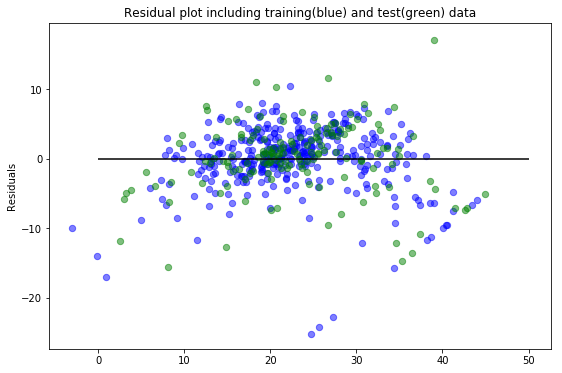

In [19]:
## Draw residual plot. If the data points are scattered randomly around the line, then our model is correct 
## and it's not missing the relationship between any two features.

plt.figure(figsize=(9,6))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel('Residuals')
plt.title('Residual plot including training(blue) and test(green) data')
plt.show()